In [114]:
# woo getting data ready for some model
import numpy as np
import pandas as pd 

In [115]:
spotify_tracks = pd.read_csv('archive/tracks.csv')
print(spotify_tracks.shape)
spotify_tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Drop duplicates with same name and artist

In [ ]:
spotify_tracks = spotify_tracks.drop_duplicates(
  subset = ['name', 'artists'],
  keep = 'last').reset_index(drop = True)
print(spotify_tracks.shape)

In [116]:
# find about these variables https://developer.spotify.com/documentation/web-api/reference/get-audio-features
spotify_tracks.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [117]:
spotify_tracks['release_date']

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [118]:
spotify_tracks['release_date']= pd.to_datetime(spotify_tracks['release_date'])
spotify_tracks['release_date']

0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, Length: 586672, dtype: datetime64[ns]

In [119]:
# remove songs older than 90'
year = 1990
exclude = spotify_tracks[spotify_tracks['release_date'].dt.year >= year]
exclude

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [120]:
# rearrange columns
cols = list(spotify_tracks.columns.values)
cols

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [121]:
df = exclude

In [122]:
df = df[['id',
        'name',
        'artists',
 'id_artists',
 'release_date',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'popularity',
]]
df.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,40
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,34
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26


In [123]:
# try and remove titles that are not in english
print(df.shape)
from langdetect import detect
test = df.copy()
# remove non latin characters so that language detection works (replace its with empty)
test['name'] = test['name'].str.encode('ascii', 'ignore').str.decode('ascii')
# remove empty rows
test = test[test["name"] != " "]
test = test[test["name"] != ""]
test = test[test['name'].notna()]

print(test.shape)

(321179, 20)
(293724, 20)


In [124]:
# actually remove stuff (?) (might not even need this tbh)
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'

    return lang

df['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)
print(test.shape)

"\ndef det(x):\n    try:\n        lang = detect(x)\n    except:\n        lang = 'Other'\n\n    return lang\n\ntest['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)\nprint(test.shape)\n"

In [125]:
test

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4,40
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4,34
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,106002,0,0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,142003,0,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,58


In [126]:
# reset index
test = test.reset_index(drop=True)

## Analyse audio features


### duration_ms

In [127]:
test['duration_ms']

0         160187
1         159560
2         141987
3         157093
4         187333
           ...  
293719    106002
293720    153293
293721    187601
293722    142003
293723    214360
Name: duration_ms, Length: 293724, dtype: int64

<Axes: >

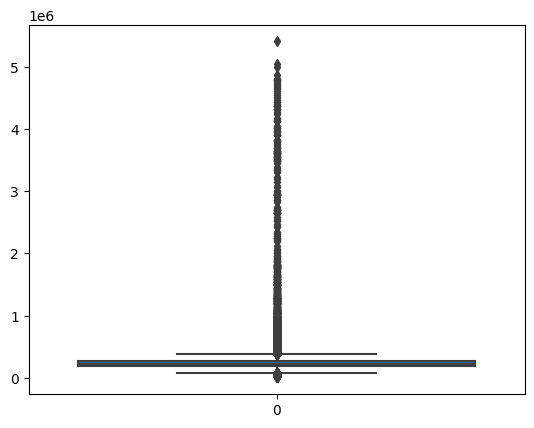

In [128]:
# identify outliers (makes it easier to detect language maybe)
import seaborn as sns
sns.boxplot(test['duration_ms'])

In [129]:

# IQR
Q1 = np.percentile(test['duration_ms'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(test['duration_ms'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_11857/3942683950.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test['duration_ms'], 25,
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_11857/3942683950.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(test['duration_ms'], 75,


79040.5

In [130]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [131]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(test['duration_ms']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(test['duration_ms']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

Upper Bound: 385974.25
(array([    30,     34,     40, ..., 293545, 293572, 293588]),)
“Lower Bound:” 69812.25
(array([    22,     25,    184, ..., 293693, 293695, 293698]),)


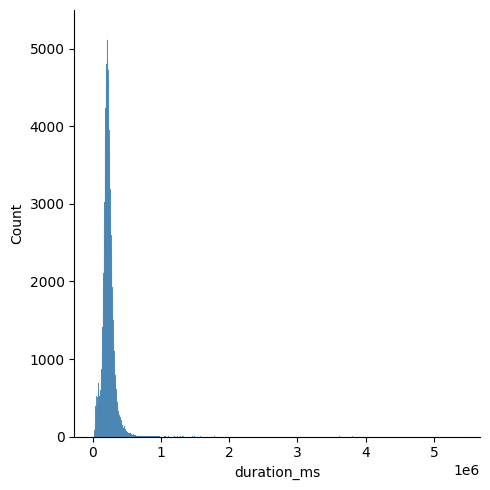

In [132]:
sns.displot(test, x="duration_ms")

In [133]:
print(test.shape)
test.drop(upper_array[0],inplace=True)
test.drop(lower_array[0],inplace=True)
 
print("New Shape: ", test.shape)

(293724, 20)
New Shape:  (277457, 20)


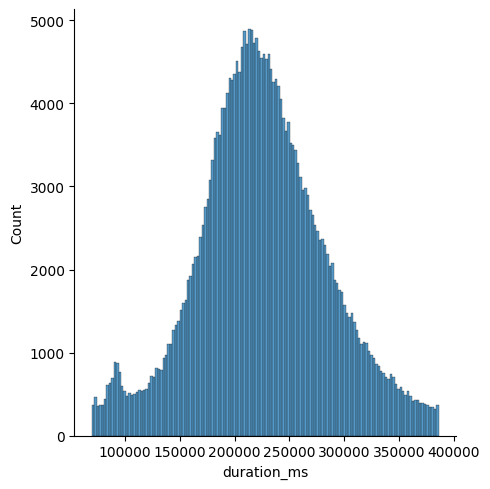

In [134]:
sns.displot(test, x="duration_ms")

In [135]:
# triple check your duration is ok (transform in minutes)
print(test['duration_ms'].max()/60000, test['duration_ms'].min()/60000)

6.4328666666666665 1.16355


In [136]:
# how many above 3.7
print(len(np.where(test['duration_ms']/60000>5)[0])/len(test['duration_ms']))
# how many below 2.5
print(len(np.where(test['duration_ms']/60000<2.5)[0])/len(test['duration_ms']))

0.1061137401471219
0.09105555095023733


I'd say cut anything over 5 (EDM) / under 2.5 (for radio, but tiktok might mess this up. depends on goal really. would probably end up cutting since you still want radio playing songs. let's see what is also in billboard first? be conservative with this cut)

In [137]:
# remove songs under and over a certain treshhold
print(test.shape)
test = test[ (test['duration_ms'] <= (5*60000)) & (test['duration_ms'] >= (2.5*60000))]
print(test.shape)

(277457, 20)
(222751, 20)


In [138]:
# check for nans
np.where(test['duration_ms'].isna())

(array([], dtype=int64),)

## release_date 

In [139]:
test.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,34
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
5,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25


In [140]:
df =  test.copy()
df['release_date']

0        2008-02-11
1        2020-03-13
3        2008-02-11
4        2018-05-04
5        2018-05-04
            ...    
293717   2020-03-03
293718   2020-03-20
293720   2020-10-21
293721   2020-09-02
293723   2015-07-01
Name: release_date, Length: 222751, dtype: datetime64[ns]

<Axes: xlabel='release_date'>

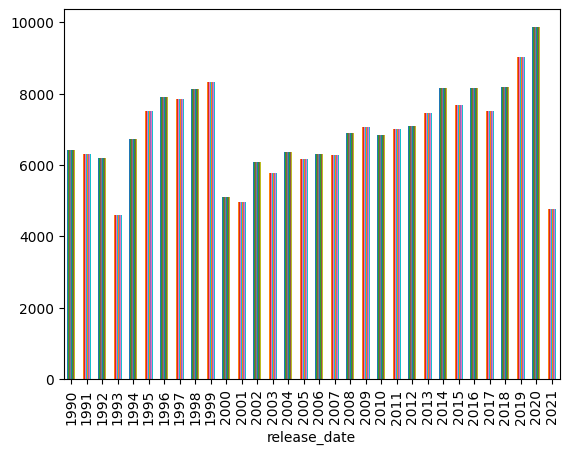

In [141]:
# Analyze by year
df.groupby(df["release_date"].dt.year).count().plot(kind="bar", legend=None)

In [142]:
# double check percentages are ok
print('90s', len(np.where(df['release_date'].dt.year <=1999)[0])/len(df['release_date']))
print('2000s', len(np.where((df['release_date'].dt.year <=2010) & (df['release_date'].dt.year >=2000))[0])/len(df['release_date']))
print('2010s', len(np.where(df['release_date'].dt.year >2010)[0])/len(df['release_date']))

# extra
print('the best years', len(np.where((df['release_date'].dt.year <=2016) & (df['release_date'].dt.year >=2011))[0])/len(df['release_date']))
print('the dead years', len(np.where(df['release_date'].dt.year >=2017)[0])/len(df['release_date']))

90s 0.31410857863713293
2000s 0.3045149067793186
2010s 0.38137651458354843
the best years 0.20466799251181814
the dead years 0.17670852207173032


Seems distrbuted jusst fine. I think there is a big difference between the early 2010s and late 2010 (can probably find articles that verify this, think coachella vs tiktok) if we want to check it out in our analysis (as an extra, or if the 2010s dont give any clear results of popularity)

Might want to even avoid 2021 if we don't then*

## popularity

do first thos

In [143]:
df.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,34
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
5,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25


In [144]:
df['popularity']

0         56
1         41
3         34
4         26
5         25
          ..
293717    43
293718    66
293720    72
293721    70
293723    38
Name: popularity, Length: 222751, dtype: int64

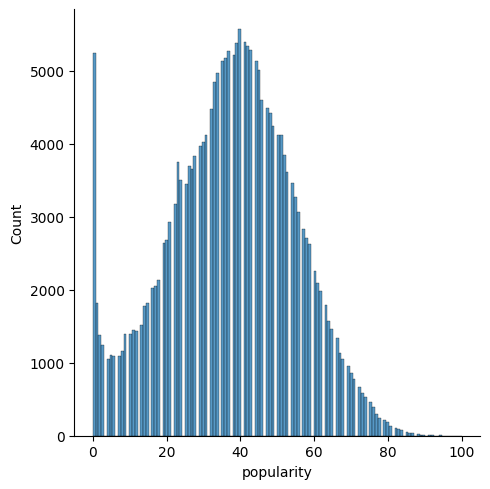

In [145]:
sns.displot(df, x="popularity")

In [146]:
# check for any nulls (spotify is from 0 to 100)
df[df['popularity'].isna()]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


In [147]:
df[df['popularity']=='']

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


In [148]:
df[df['popularity']==' ']

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


## explicit

Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).


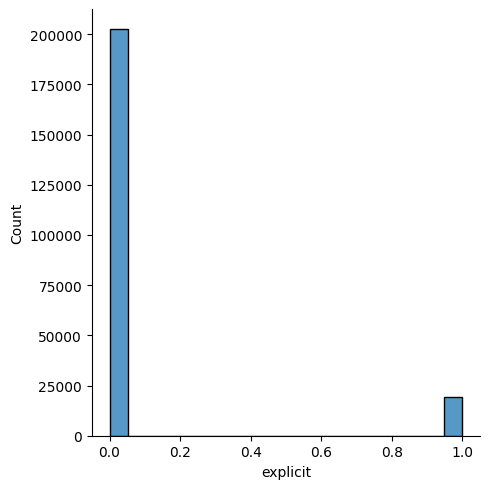

In [159]:
sns.displot(df, x="explicit")

In [ ]:
# find all columns with NaN values (see past project to viz this when the time to make it prety comes)
df.isnull().any()


id                  False
name                False
artists             False
id_artists          False
release_date        False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
popularity          False
dtype: bool

Will not deal much with this bc it's going to die anyway.

## key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Example value: 9
Range: -1 - 11

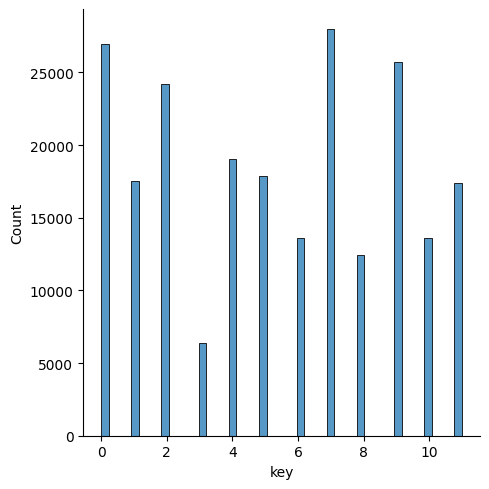

In [ ]:
sns.displot(df, x="key")

In [ ]:
df[df['key']==-1]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


## mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

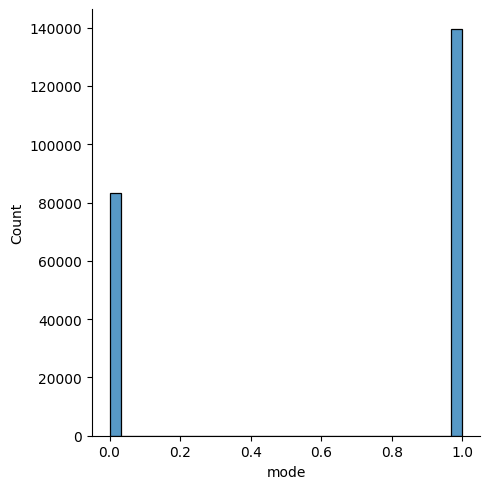

In [ ]:
sns.displot(df, x="mode")

## time_signature

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
Example value: 4
Range: 3 - 7

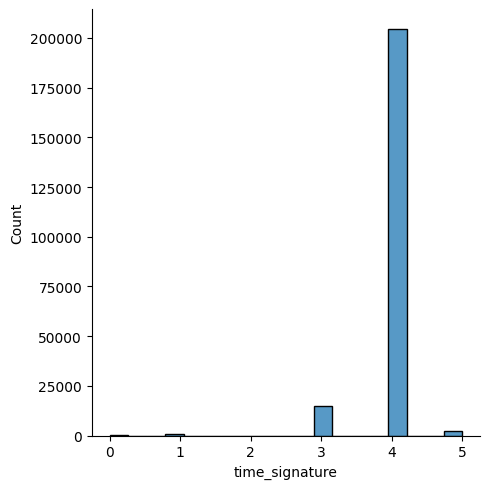

In [ ]:
sns.displot(df, x="time_signature")

In [ ]:
df[df['time_signature']==0]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
22202,7dTyZl4cBRKnPBeq1fdrHY,White Noise,['Rain Sounds'],['5nSGBmlgUdqWNExnOX8VtV'],2012-05-07,240000,0,0.000,0.601000,4,-13.753,0,0.0000,0.119000,0.77100,0.9680,0.000,0.000,0,64
26061,3hJJOnsafnWFrhWDwhvZSy,Box Fan Rest Sound,['Fan Sounds'],['3rolEAXFOTW33tkUA2VOuo'],2016-11-11,222760,0,0.000,0.000020,4,-25.213,1,0.0000,0.138000,0.14500,0.1120,0.000,0.000,0,69
27730,129ldjjvnFfA7Ygc8ktYnh,Soft Brown Noise,['High Altitude Samples'],['3T9Rn6sxhCylmpTyWCuu1f'],2018-11-15,160003,0,0.000,0.001480,5,-31.839,1,0.0000,0.394000,1.00000,0.1110,0.000,0.000,0,76
29590,3YYni1jodOmekz697cuwhl,Its Been A Year,"['No Spirit', 'Kyle McEvoy']","['4XbnhifKeOnyfTsCInrQsX', '6rRqxCKHpl9C5Imf2u...",2020-03-18,163077,0,0.000,0.268000,0,-12.754,1,0.0000,0.601000,0.82100,0.0525,0.000,0.000,0,25
43124,3AFEx7f9qxc6U59s27Tp1V,White Noise Crashing Waves,['Bruce Brus'],['6jKgLzBdINpIrcinbmi7hI'],2019-08-09,168000,0,0.000,0.000431,0,-14.105,0,0.0000,0.862000,0.97700,0.1620,0.000,0.000,0,72
66109,0YYauGVTE5YbcwD33f0MUB,Clean Pink Noise - Loopable with No Fade,['Pink Noise Babies'],['3IbU77P0FS0SrnmP45ssrx'],2017-09-04,195195,0,0.000,0.000020,1,-9.511,1,0.0000,0.001670,0.94500,0.5980,0.000,0.000,0,55
66429,18lKp9uRyR2xJZFvg8ZWUC,Clean & Pure White Noise,['Zenibly'],['3Lbo9NybtvftZ5hgfe8KVg'],2018-08-01,150000,0,0.000,0.092400,1,-26.764,1,0.0000,0.455000,0.40800,0.1110,0.000,0.000,0,70
66472,2GBvksBLD4dLqjKbqp4uor,Clover,['Granular'],['1jfnMuDBl5OaAoU0VwLD8m'],2018-07-06,235135,0,0.000,0.010900,5,-20.829,1,0.0000,0.982000,0.17600,0.1270,0.000,0.000,0,62
71006,6NBiOy0zOS8oXXX5e87PkT,Vacuum Cleaner,['Baby Sweet Dream'],['7M4enEYox7R9wzknseZnxC'],2010-01-01,300000,0,0.000,0.000199,0,-32.778,1,0.0000,0.982000,0.89700,0.9250,0.000,0.000,0,38
71051,3cJbNaXdqRuuEoksg0j7LC,Pure White Noise,['Baby Sweet Dream'],['7M4enEYox7R9wzknseZnxC'],2010-01-01,300000,0,0.000,0.000020,6,-33.764,0,0.0000,0.690000,0.42000,0.8630,0.000,0.000,0,46


In [ ]:
# loool remove duplicates by id? if any

id
0004Uy71ku11n3LMpuyf59    False
000CSYu4rvd8cQ7JilfxhZ    False
000KblXP5csWFFFsD6smOy    False
000RDCYioLteXcutOjeweY    False
000TiSS4vK5su0MkoFyQbd    False
                          ...  
7zzhknA0A39TH81meuX7WA    False
7zzoxJbgjme3366mOp5UnH    False
7zzqq4eJe4zKpYCHckNi1K    False
7zztLmdxNYrjTQ4XqUK8cp    False
7zztk8Ecg9qDRLX3XNfSyq    False
Length: 222751, dtype: bool


In [ ]:
# remove anythign  with white noise in it <3


In [ ]:
df[df['time_signature']==1]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
29,6l82JF2bHWDnbdSp7mw5dP,"It Was A Very Good Year - Live At The Sands, L...","['Frank Sinatra', 'Count Basie']","['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...",2006-11-07,231267,0,0.329,0.224,10,-17.672,1,0.0737,0.87700,0.000004,0.9590,0.2360,80.532,1,14
31,6bgnQlDQKgni9fH7mEQ1sC,"The September Of My Years - Live At The Sands,...","['Frank Sinatra', 'Count Basie']","['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...",2006-11-07,183960,0,0.292,0.220,7,-16.917,1,0.0431,0.88600,0.000001,0.9090,0.2210,108.978,1,13
270,4isHNeD2knqlQ850CykFMq,"Big ""B""",['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,221133,0,0.372,0.697,8,-9.838,1,0.0395,0.28700,0.878000,0.0836,0.5560,163.248,1,1
339,061wPjsBtaMBfWbUA1Ev36,For Loving You,['Bill Anderson'],['0gWNSMYCSHF4wxIs1XTSDh'],2011-06-13,166680,0,0.426,0.185,3,-20.106,1,0.0476,0.86900,0.000016,0.3420,0.4410,122.964,1,0
659,4xVZmLJtBTedcXbDB3qYdX,(En) El Sptimo Da - Remasterizado 2007,['Soda Stereo'],['7An4yvF7hDYDolN4m5zKBp'],1990-10-09,263280,0,0.582,0.864,4,-6.356,1,0.0260,0.00180,0.000578,0.1700,0.8900,106.191,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291881,3Dyk8yOy6vs4hOvJ8UPJAe,Fire of Us - Alexxi Radio Edit,['Alaa'],['0F2YGp10ROcJQa9Z9jwp9v'],2014-08-04,242896,0,0.661,0.602,9,-8.767,0,0.0592,0.00312,0.003030,0.1020,0.3030,128.033,1,40
292684,3B3y6Y9ZwvsSIliE4mH5TT,This Is the One,['Anna Ternheim'],['6xSTQT32ZxLQPe37QIC308'],2019-09-20,221082,0,0.583,0.366,11,-10.098,0,0.0393,0.84900,0.000103,0.0979,0.3020,76.033,1,55
293202,6t9p80a2DUZhjBCh5MotjB,Borde g hem,['Bolaget'],['55ZGFvikpNjQHvtTWS5aZF'],2021-03-17,156000,0,0.724,0.448,5,-9.918,0,0.0562,0.38700,0.000000,0.3970,0.7170,129.950,1,59
293358,58hyDWe9z3FzYfn7J28Yc7,Litany of the Saints,['The Cathedral Singers'],['6GCii6lkUhkzTrznRyCuVh'],1995-01-01,226773,0,0.182,0.147,2,-20.933,1,0.0328,0.97100,0.145000,0.1860,0.0389,96.233,1,25


Come back to this, but estimated so probs can remove (if we end up using time_signature, if not come back, reassess, bc its like 2 k).
https://github.com/spotify/web-api/issues/379 

In [153]:
df = df[(df['time_signature'] != 0) & (df['time_signature'] !=1)]


In [156]:
df.columns

Index(['id', 'name', 'artists', 'id_artists', 'release_date', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popularity'],
      dtype='object')

## Proper audio

### Danceability
 A value of 0.0 is least danceable and 1.0 is most danceable.

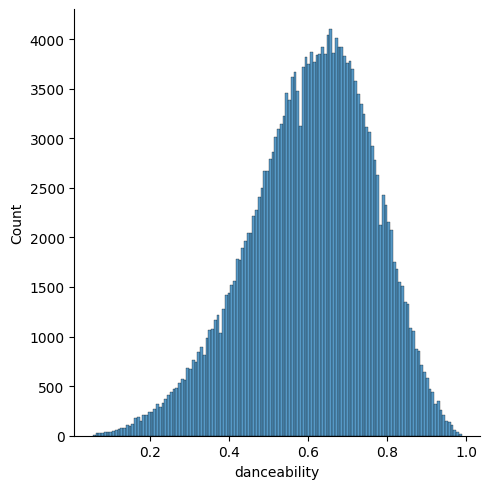

In [158]:
sns.displot(df, x="danceability")

In [172]:

# IQR
Q1 = np.percentile(df['danceability'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['danceability'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(df['danceability']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(df['danceability']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

Upper Bound: 1.037
(array([], dtype=int64),)
“Lower Bound:” 0.18900000000000006
(array([    15,    251,    318, ..., 221468, 221529, 221631]),)


/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_11857/3558776777.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['danceability'], 25,
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_11857/3558776777.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['danceability'], 75,


In [162]:
len(lower_array[0])

1697

idk if to remove or not, maybe on second round look at what songs these are

In [171]:
df = df.reset_index(drop=True)
df

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.2650,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.8670,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
2,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,157093,0,0.477,0.3520,1,-14.165,1,0.0300,0.406,0.000000,0.1220,0.4780,106.773,4,34
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.2010,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
4,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.1290,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221655,1Kzjk1EyngBcP4T8x3fyqv,(...),['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,205238,0,0.743,0.6790,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.3950,126.070,4,43
221656,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,66
221657,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
221658,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70


### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

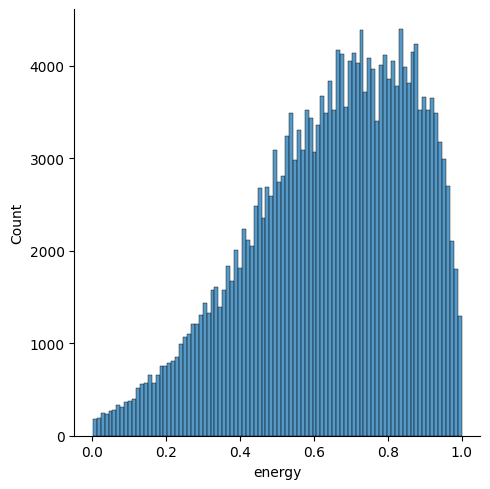

In [175]:
sns.displot(df, x="energy")

## loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

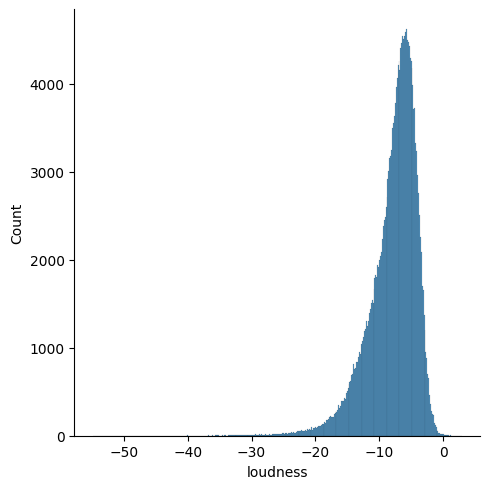

In [179]:
sns.displot(df, x="loudness")

In [186]:
df[df['loudness']>0]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
7880,0ImsKMiwanBdHWTIxhMnJg,Year 3000,['Zen'],['7Jf2WduAnraowinployZsu'],2013-11-24,286424,0,0.765,0.938,2,0.781,1,0.0860,0.052600,0.077900,0.1500,0.1510,175.011,4,1
7883,4d3tNjH6aYSxdpWSIdoIcq,Year 3000,['Zen'],['7Jf2WduAnraowinployZsu'],2013-08-12,286424,0,0.765,0.933,2,0.781,1,0.0903,0.053000,0.077100,0.1500,0.1650,175.011,4,0
12326,49ErwcBYfYRPNBdRuPvpYA,We Are Your Friends - Justice Vs Simian,"['Justice', 'Simian']","['1gR0gsQYfi6joyO1dlp76N', '19rgRqYVP3LJf9tGmM...",2006-01-01,262773,0,0.615,0.970,9,1.342,0,0.1190,0.010400,0.384000,0.1780,0.5070,122.993,4,62
15174,5rZL9VxQ2SVpF2sG8OmmNQ,The En4orcer Riddim,['Blakk Boii Frazzle'],['3gDIEtaiNBM8jez8vlnQEX'],2020-07-25,192024,0,0.806,0.849,0,0.403,1,0.0449,0.137000,0.878000,0.1680,0.5050,120.132,4,0
15478,7t4mx7fDYsedIB9VOI4oR9,Fuck Year - Demo 2011,['Každej Rock Jinak'],['72ZUvINfhfKceaAvJtPPdX'],2013-11-23,192522,1,0.491,0.985,7,0.109,1,0.2180,0.042700,0.288000,0.0747,0.1260,129.075,4,0
17134,64cs180BpdP9vrKnaYdJna,1000 Years - BARE Remix,['Gina Star'],['6wHb8gl20vNhakwMKrp1bv'],2013-10-06,180004,0,0.705,0.973,6,1.027,0,0.1760,0.004340,0.039400,0.3300,0.5610,144.002,4,1
17136,6nuHpUh1HP2LYSzZMCMXy2,1000 Years - BARE Remix,['Gina Star'],['6wHb8gl20vNhakwMKrp1bv'],2013-10-06,180004,0,0.705,0.973,6,1.027,0,0.1760,0.004340,0.039400,0.3300,0.5610,144.002,4,0
21087,4oumhcbfNPdF36OrIfv4YS,Move Ma Body,"['Atmozfears', 'Demi Kanon']","['0MBGxwmCdXdO26ojaNcT64', '0MwTAzU4fDGGfrUAHz...",2019-12-27,160187,1,0.687,0.957,9,0.101,0,0.1530,0.034800,0.083000,0.4240,0.3560,150.055,4,6
23181,2jokiK1VyPvStUr4kKhgdZ,Suicide Bound - 1993 Unreleased Version,['Opposition Party'],['638OIdFOJet787Xb5mZfVt'],2004-01-01,294493,0,0.239,0.993,4,2.854,0,0.1000,0.001570,0.262000,0.1140,0.3250,150.862,4,0
23324,1gBm8yGdR8e4qv9GyEpSWH,Demon,['Solar Eclipse'],['1i1enVClUTfruGPkLXCrTw'],2014-01-17,288072,0,0.421,0.999,5,1.933,0,0.2480,0.002540,0.958000,0.5150,0.1130,157.986,4,0


There are some songs that are so random, like arsen petrosov ! has pop 43 just bc russia I guess? idk
how do you even deal with this? you have to remove non english songs by lyrics (but double do it just so it's less on genius api)

In this case idek if to remove the outliers bc i do not have the industry knowledge!

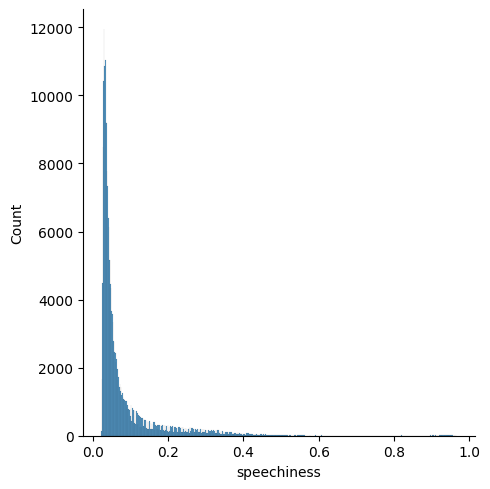

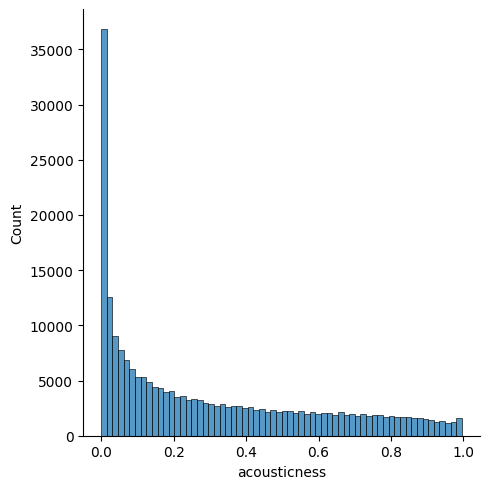

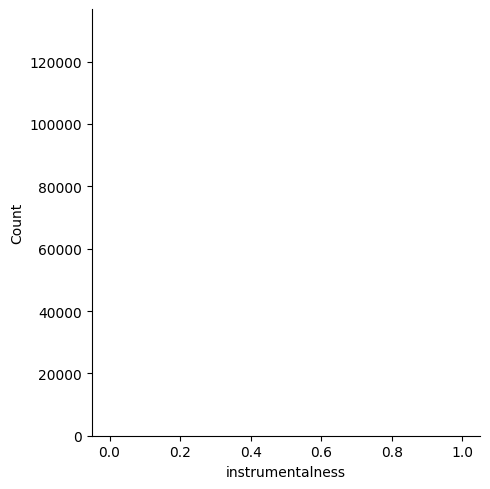

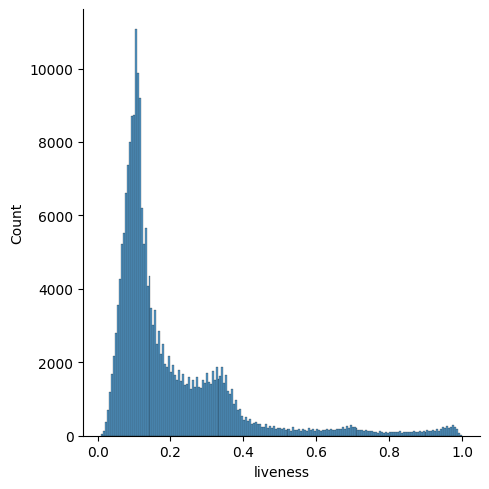

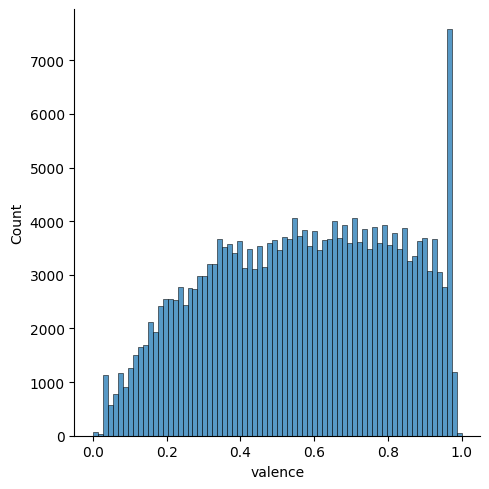

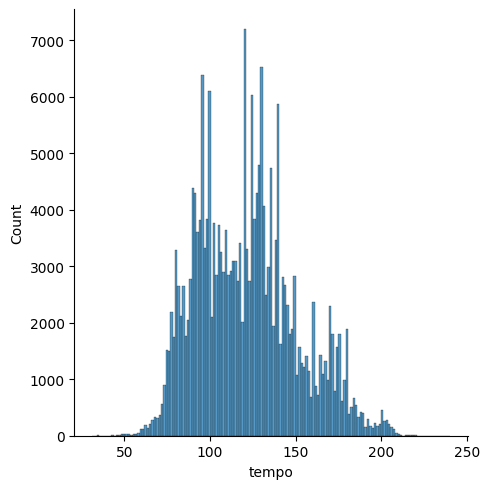

In [191]:
listy = ["speechiness",'acousticness','instrumentalness','liveness','valence','tempo']

for item in listy:
    sns.displot(df, x=item)

### Speechines
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

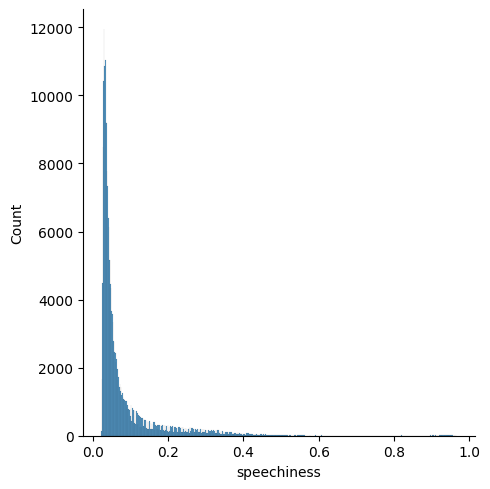

In [193]:
sns.displot(df, x='speechiness')

In [195]:
df[df['speechiness']>0.8]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
79,2SAVRKmLj3WCMNDuINR59y,New Year's With The Wife - Live On The Ed Sull...,['Alan King'],['2ICPGKqTJyyMlcYPriF6Kb'],2020-08-21,256623,0,0.535,0.4820,11,-15.272,1,0.843,0.952,0.000002,0.9690,0.450,127.343,4,0
4424,3enjxX3aOAsFyaKeH1O9jO,Sound Bwoy Bureill,['Smif-N-Wessun'],['2p0Hf0MF8Nw8lwAXokczf0'],1995-01-01,259453,1,0.708,0.3050,9,-14.003,1,0.817,0.138,0.000003,0.1390,0.691,174.154,4,52
6614,4Vp7PokYymcoThbUoA8sQX,Prayer - Skit,['DMX'],['1HwM5zlC5qNWhJtM00yXzG'],1998-05-01,152133,1,0.717,0.1860,0,-20.016,0,0.939,0.469,0.000000,0.4600,0.213,102.082,4,55
8046,2Hn9a8dD2QuPiBHdP46XtZ,Black The 3000 Year Old Dirty Bastard,['The Black Sombrero'],['4xQK2Cd1kpdTYNRIgwhYDZ'],2015-08-10,160619,0,0.459,0.3420,7,-22.815,1,0.838,0.275,0.003670,0.0515,0.072,94.965,4,0
8537,55VqxXi21UxYikKbrMXv54,Neujahrsgru / New Year's Address / Allocution ...,"['Riccardo Muti', 'Wiener Philharmoniker']","['7silW8RiEOoLBgAg5JBCL1', '003f4bk13c6Q3gAUXv...",2021-01-08,217360,0,0.711,0.0983,1,-28.235,1,0.899,0.778,0.000000,0.6200,0.359,111.518,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219641,0SQ21hh6dRqGQjJvdrqpT6,Skalman glmde ngon,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,265560,0,0.640,0.3850,1,-11.481,1,0.946,0.872,0.000000,0.1400,0.571,85.981,3,34
219643,7kneBuGnCYK6woxJnc0RAn,Teddy gr vilse - Del.2,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,258750,0,0.693,0.3610,1,-10.874,1,0.940,0.932,0.000000,0.1250,0.495,80.849,3,34
219644,0kA4NEa4kQGDSkKm0eXhmh,Bamse och Sjrvarna - Del.7,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,208006,0,0.717,0.5070,9,-11.616,0,0.940,0.926,0.000000,0.6790,0.371,115.369,3,34
219647,4Aiu6JHgtyvN9yab4E4stM,Teddy gr vilse - Del.3,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,254858,0,0.716,0.3080,10,-11.326,0,0.897,0.940,0.000007,0.1720,0.605,123.693,3,34


Iffy to cut these bc of rap songs

### Instrumentalness

In [197]:
df[df['instrumentalness']>0.9]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
15,4xgiFXUbqLpjFk9e3dUEMA,"Ecstasy of Gold - From ""The Good, the Bad and ...",['Ennio Morricone'],['1nIUhcKHnK6iyumRyoV68C'],2012-09-05,220653,0,0.172,0.6460,9,-8.897,0,0.1690,0.7170,0.933,0.6810,0.12400,99.187,4,14
32,4WybrSagfGRf79Wfn7EW0w,Spring Is Nearly Here,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,183293,0,0.351,0.2910,0,-12.580,1,0.0276,0.9590,0.902,0.1360,0.34400,105.337,3,9
46,1g7aiW95iJAXelKj5rizFF,Apache,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,174187,0,0.595,0.4510,9,-12.987,0,0.0288,0.0106,0.929,0.0962,0.77900,133.673,4,6
81,0LOJBeEWjFY1Uo924xVj7A,"Theme - From ''The Battle of Algiers'', 1966",['Ennio Morricone'],['1nIUhcKHnK6iyumRyoV68C'],2012-09-05,152707,0,0.537,0.7940,9,-10.669,1,0.0662,0.6410,0.947,0.0874,0.56000,123.538,4,4
107,68Ty1JVjb8OZepzlREds6b,Genie with the Light Brown Lamp,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,160333,0,0.402,0.7640,0,-10.964,1,0.0305,0.2340,0.950,0.0335,0.96200,88.900,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221609,3zLTPuucd3e6TxZnu2dlVS,"Bagatelle No. 25 in A Minor, WoO 59 ""Fr Elise""","['Ludwig van Beethoven', 'Igor Levit']","['2wOqMjp9TyABvtHdOSOTUS', '0japPUWMmW3gxqjSB1...",2015-01-01,212067,0,0.289,0.0306,9,-30.790,0,0.0446,0.9870,0.911,0.1020,0.11800,125.610,3,48
221621,2fIVdzd4JW4HnwzqrvCysf,Let Her Go,['David Fischbein'],['4SnnTtHKeeWxZ8FxzMv435'],2016-10-07,192727,0,0.257,0.0317,8,-23.030,1,0.0424,0.9890,0.944,0.1600,0.26800,205.506,4,60
221625,3s4zQCLsI9YG2XSw7fmkeO,Brahms' Lullaby,['Eugene Lopin'],['5fnKsV4JHpqMoKyhKjQmj6'],2017-10-25,186217,0,0.540,0.2740,3,-11.902,1,0.0358,0.9090,0.959,0.2390,0.35300,79.973,3,44
221631,3LMvyfd6x8OVW6VvYDFlNB,Lush Rain,['Rain Hard'],['5SGuAyOqyIejlY3Lxv7CjX'],2017-05-05,204750,0,0.168,0.9980,3,-21.382,0,0.0566,0.1580,0.903,0.9490,0.00001,123.148,4,57


Deal with soundtracks? but also classical music rip, cant delete <3 unless goal changes (or don't include billboard anymore)

In [ ]:
# sound track

### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

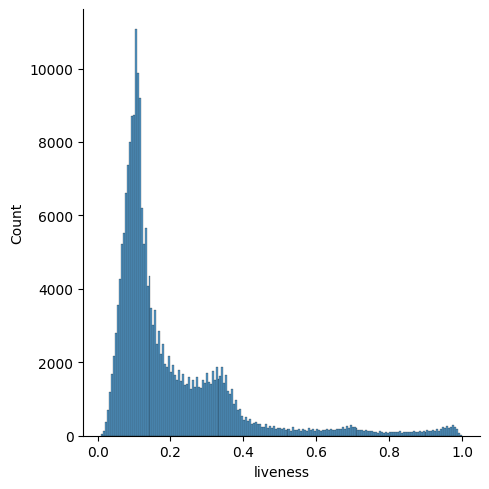

In [201]:
sns.displot(df, x='liveness')

In [204]:
df[df['liveness']>0.9]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.88700,0.000000,0.904,0.23900,117.153,3,26
7,67BBzbF6t4ejG7HwVjQ4Tm,"Love For Sale - Live At Chez Club, Hollywood/1...",['Buddy Rich Big Band'],['5cyeaYQ80Wkqvxx4HcY0jo'],1997-01-01,291573,0,0.409,0.839,5,-7.695,0,0.2000,0.44500,0.235000,0.958,0.55700,112.624,4,18
48,4tAY3clWeIHaGWcKwl860R,Olen hautausmaa - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,153733,0,0.441,0.682,2,-12.390,1,0.0336,0.33000,0.000000,0.930,0.86400,141.795,4,5
50,1bQHK0D7WjvDIaGyFZyokA,Lumi teki enkelin eteiseen - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,234200,0,0.311,0.340,7,-15.079,1,0.0416,0.53000,0.000000,0.988,0.31000,134.892,4,7
51,1kdRZuRMnqlePLONWkMNkW,Juodaan viinaa - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,219240,0,0.513,0.920,7,-10.882,1,0.0719,0.26700,0.000000,0.970,0.62900,120.052,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220313,18lJtRd5zSqezlKjD5treG,Nu kan du f mig s ltt (Live),['Håkan Hellström'],['3H7Ez7cwaYw4L3ELy4v3Lc'],2014-12-12,296587,0,0.166,0.369,7,-16.221,1,0.0516,0.90300,0.000000,0.972,0.34800,69.835,4,37
220834,1VBUOK5nkeNgKVDpfd0PPW,Hng med p party,['Titanix'],['6qbReoCHJ3BPXU47VxeajP'],2018-07-13,247693,0,0.621,0.940,6,-5.816,0,0.0585,0.00464,0.000002,0.936,0.78500,141.990,4,45
221482,7Dyk3PpDhJPkxpTGGxiu6X,Lord Reign in Me,"['Vineyard Worship', 'Brenton Brown']","['7cvnCTBvMm6OvTutfCpxjL', '3oZR0tAkfIn1YmLe1f...",1998-07-11,237321,0,0.420,0.884,0,-5.014,1,0.0381,0.24600,0.002690,0.966,0.50000,91.124,4,33
221545,2H3KAEoeYJnngTHY6PGK8i,Be My Lover,['La Bouche'],['488v7rQzthLNK22r0UvMie'],2007-01-01,240867,0,0.658,0.963,1,-3.283,0,0.0326,0.00283,0.000002,0.951,0.79300,134.798,4,23


In [205]:
# actually remove stuff (?) (might not even need this tbh)
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'

    return lang

df['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)
print(test.shape)